<a href="https://colab.research.google.com/github/aarushM923/Flower-Recognition/blob/main/flower_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

# Change the directory to the folder containing flower_images
os.chdir('/content/drive/My Drive/flower_images')

# List the contents of the folder
print(os.listdir())

['.DS_Store', 'Orchid', 'Lilly', 'Sunflower', 'Tulip', 'Lotus', 'Flower_Recog_Model.h5', 'flower_recognition.keras']


In [4]:
import os
count = 0
# List all directories in the 'flower_images' folder
dirs = os.listdir('/content/drive/My Drive/flower_images')

# Loop through each directory
for dir in dirs:
    dir_path = os.path.join('/content/drive/My Drive/flower_images', dir)

    # Check if the current path is a directory
    if os.path.isdir(dir_path):
        # List all files in the subdirectory
        files = os.listdir(dir_path)

        # Count the number of image files
        image_count = len([file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

        # Print the directory name and the number of images
        print(f"{dir}; folder has {image_count} images")
        count = count + len(files)

print(count)

Orchid; folder has 1000 images
Lilly; folder has 999 images
Sunflower; folder has 1020 images
Tulip; folder has 1000 images
Lotus; folder has 1000 images
5021


In [5]:
base_dir = '/content/drive/My Drive/flower_images/'
img_size = 100
batch = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    batch_size = batch,
    image_size = (img_size, img_size)

)
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    batch_size = batch,
    image_size = (img_size, img_size)

)

Found 5019 files belonging to 5 classes.
Using 4016 files for training.
Found 5019 files belonging to 5 classes.
Using 1003 files for validation.


In [7]:
flower_names = train_ds.class_names
flower_names

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

In [8]:
import matplotlib.pyplot as plt

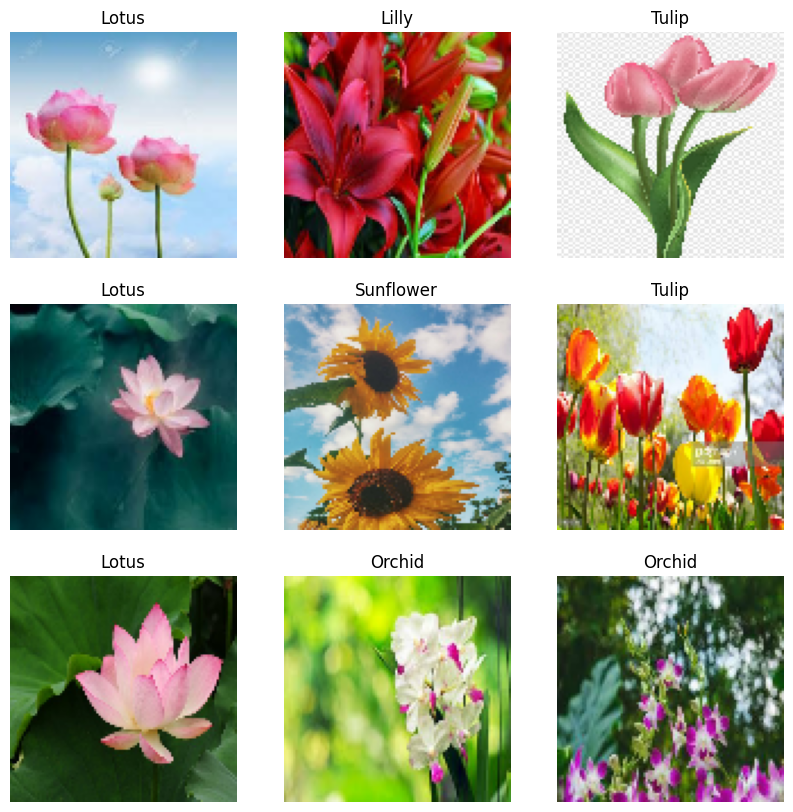

In [9]:
plt.figure(figsize=(10, 10))
i = 0
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(flower_names[labels[i]])
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
#data augmentation

In [13]:
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

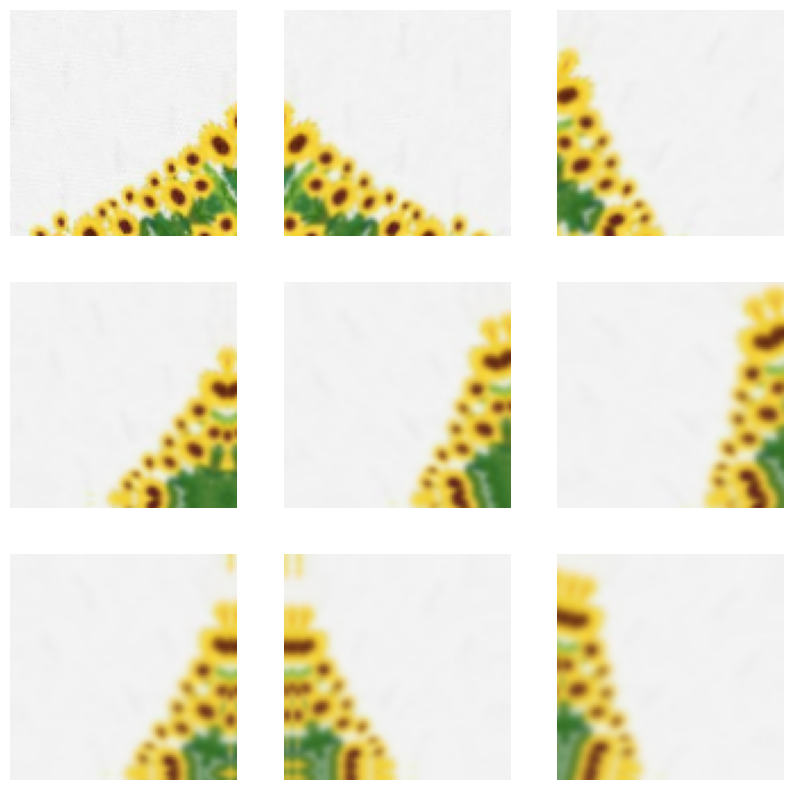

In [14]:
plt.figure(figsize=(10, 10))
i = 0
for images, labels in train_ds.take(1):
  for i in range(9):
    images = data_augmentation(images)
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")

In [15]:
#model creation

In [16]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(flower_names))
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                 

In [19]:
history = model.fit(
    train_ds,
    epochs = 15,
    validation_data = val_ds
)

Epoch 1/15
126/126 [==============================] - 305s 2s/step - loss: 1.2603 - accuracy: 0.4749 - val_loss: 1.2728 - val_accuracy: 0.4786
Epoch 2/15
126/126 [==============================] - 50s 400ms/step - loss: 1.0657 - accuracy: 0.5625 - val_loss: 1.0571 - val_accuracy: 0.5653
Epoch 3/15
126/126 [==============================] - 50s 401ms/step - loss: 0.9937 - accuracy: 0.6001 - val_loss: 1.0929 - val_accuracy: 0.5713
Epoch 4/15
126/126 [==============================] - 53s 418ms/step - loss: 0.9310 - accuracy: 0.6275 - val_loss: 0.9376 - val_accuracy: 0.6431
Epoch 5/15
126/126 [==============================] - 50s 400ms/step - loss: 0.8631 - accuracy: 0.6569 - val_loss: 0.8396 - val_accuracy: 0.6849
Epoch 6/15
126/126 [==============================] - 51s 402ms/step - loss: 0.8189 - accuracy: 0.6773 - val_loss: 0.8330 - val_accuracy: 0.6810
Epoch 7/15
126/126 [==============================] - 50s 399ms/step - loss: 0.7754 - accuracy: 0.6967 - val_loss: 0.7817 - val_accu

In [26]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

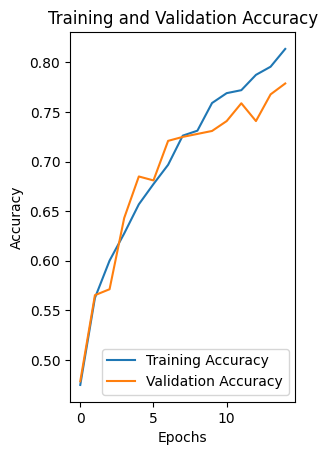

In [27]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

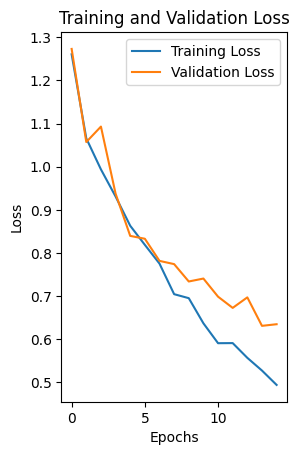

In [28]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [29]:
plt.show()

In [20]:
directory = '/content/drive/MyDrive/flower_images/Tulip'


files = os.listdir(directory)


In [21]:
directory = '/content/drive/MyDrive/flower_images/Tulip'

files = [os.path.join(directory, file) for file in os.listdir(directory)]


In [22]:

# Load the image
def classify_images(image_path):
  input_image = tf.keras.utils.load_img(image_path)

  input_image_resized = input_image.resize((100, 100))

  input_image_array = tf.keras.utils.img_to_array(input_image_resized)

  input_image_exp_dim = tf.expand_dims(input_image_array, 0)

  predictions = model.predict(input_image_exp_dim)

  result = tf.nn.softmax(predictions[0])
  outcome = 'The image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
  return outcome


In [24]:
classify_images('/content/tulip.jpeg')

1/1 [==============================] - 0s 373ms/step


'The image belongs to Tulip with a score of 82.44353532791138'

In [25]:
model.save('flower_recognition.keras')